In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert3/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert3/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert3/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/audio/new_data_set_fusion/expert3/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(207, 1653, 207, 1653, 207, 207)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(1860, 1860)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

1860

In [10]:
df_train

,labels
0,5
1,3
2,4
3,4
4,1
...,...
1855,4
1856,5
1857,4
1858,5


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,3.847681e-07,0.000165,0.999427,0.000011,0.000015,0.000382,5.709566e-10,6.048259e-05,9.983827e-01,1.003871e-03,4.657778e-04,8.722467e-05
1,4.080357e-04,0.000278,0.000032,0.975605,0.000084,0.023593,3.210036e-08,6.641395e-05,2.010758e-06,9.993819e-01,5.591047e-07,5.490086e-04
2,8.029334e-06,0.000003,0.000078,0.000781,0.000026,0.999103,2.191268e-08,6.277464e-09,7.538927e-06,7.692809e-01,6.501456e-07,2.307109e-01
3,8.195345e-01,0.010879,0.000053,0.161156,0.000378,0.008000,1.192593e-12,3.812688e-12,7.447705e-19,1.000000e+00,3.033021e-09,5.245816e-11
4,9.327391e-08,0.000213,0.999510,0.000028,0.000003,0.000246,1.365382e-14,3.206715e-08,9.999564e-01,3.360592e-10,4.361143e-05,1.483322e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
202,4.144497e-04,0.000421,0.000023,0.994940,0.000056,0.004145,4.196479e-04,4.794175e-04,1.040976e-01,8.565566e-01,4.861494e-03,3.358527e-02
203,6.430261e-05,0.068198,0.931112,0.000107,0.000038,0.000480,1.452160e-12,3.306182e-09,9.999998e-01,1.836027e-09,2.017630e-07,1.592038e-08
204,1.150483e-02,0.986242,0.000204,0.002006,0.000028,0.000016,1.576803e-03,9.876078e-01,3.730932e-03,7.075741e-03,1.962299e-07,8.604891e-06
205,1.152764e-05,0.000007,0.000231,0.004078,0.000060,0.995612,2.021221e-08,1.525252e-08,1.082264e-02,8.012521e-03,4.813148e-03,9.763516e-01


In [13]:
len(x_test),len(x_train)

(207, 1860)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,1.342762e-05,0.000012,2.062135e-04,0.004942,0.000055,9.947707e-01,2.467135e-10,1.031010e-13,7.202210e-11,6.935531e-04,3.309902e-05,9.992734e-01
1,6.808462e-04,0.000532,1.420739e-04,0.967613,0.000086,3.094518e-02,4.183742e-03,1.883682e-03,3.485763e-04,9.928458e-01,7.599917e-06,7.305745e-04
2,6.382396e-06,0.000014,3.164888e-07,0.000078,0.999668,2.334870e-04,4.291472e-11,2.094751e-14,3.376433e-09,7.982301e-07,9.999894e-01,9.769135e-06
3,1.216768e-05,0.000016,9.738202e-07,0.000070,0.999058,8.416994e-04,2.389318e-06,2.958119e-08,1.107930e-04,1.670382e-05,9.998677e-01,2.399141e-06
4,3.387133e-05,0.999711,1.496905e-04,0.000090,0.000015,7.047519e-07,7.133755e-10,9.999399e-01,5.691175e-05,2.263207e-06,8.316588e-07,7.332062e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1.730688e-03,0.000940,9.109009e-05,0.042585,0.514992,4.396609e-01,3.800477e-05,4.158589e-06,9.094679e-02,4.744317e-03,8.813667e-01,2.289999e-02
1856,7.937995e-05,0.000008,8.498927e-05,0.006586,0.000129,9.931120e-01,1.410332e-11,1.408649e-11,4.407951e-12,9.819090e-01,6.792979e-07,1.809031e-02
1857,4.019840e-07,0.000003,9.252089e-08,0.000062,0.999855,7.927581e-05,1.325367e-10,1.554187e-11,5.853306e-06,2.239259e-05,9.999714e-01,3.096777e-07
1858,2.571352e-05,0.000011,2.133435e-04,0.015691,0.000191,9.838685e-01,8.621478e-04,1.110208e-05,3.831854e-03,2.622769e-01,1.219267e-02,7.208254e-01


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

1860

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape

(array([5, 3, 4, ..., 4, 5, 2]), (1860,))

# training machine learning

In [19]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='rbf')
svm=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [20]:
predictions

array([2, 3, 5, 3, 2, 4, 1, 4, 0, 5, 0, 3, 1, 5, 3, 2, 1, 3, 1, 2, 4, 5,
       5, 5, 1, 2, 1, 2, 2, 2, 2, 5, 3, 5, 3, 2, 1, 3, 4, 3, 1, 5, 0, 4,
       1, 1, 0, 0, 4, 3, 1, 2, 4, 1, 3, 5, 2, 5, 2, 4, 0, 3, 5, 4, 3, 5,
       5, 2, 3, 1, 5, 5, 5, 3, 3, 4, 1, 1, 5, 3, 2, 0, 5, 0, 3, 4, 1, 0,
       5, 0, 1, 4, 1, 4, 3, 3, 1, 0, 4, 3, 1, 0, 2, 5, 0, 5, 1, 0, 1, 2,
       3, 4, 3, 0, 4, 5, 1, 0, 2, 1, 4, 5, 5, 2, 1, 0, 3, 3, 2, 1, 4, 5,
       4, 1, 2, 4, 3, 1, 4, 2, 4, 4, 3, 5, 2, 2, 0, 2, 5, 4, 4, 2, 1, 3,
       1, 1, 4, 2, 0, 2, 5, 0, 2, 1, 3, 3, 2, 4, 3, 2, 4, 3, 1, 0, 2, 3,
       1, 2, 2, 4, 1, 5, 5, 4, 2, 3, 4, 4, 5, 2, 4, 5, 2, 1, 1, 3, 4, 4,
       3, 0, 2, 2, 3, 2, 1, 5, 3])

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.95      0.97      0.96        37
           2       1.00      1.00      1.00        40
           3       0.92      0.95      0.93        37
           4       0.97      0.97      0.97        35
           5       0.97      0.92      0.94        36

    accuracy                           0.96       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.96      0.96      0.96       207

----accuracy score 96.1352657004831 ----


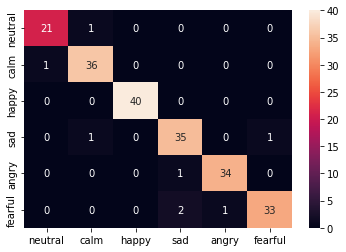

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/fusion_model/SVM/rbf/expert3 '
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
